<div style="width: 100%; margin: 0 auto;">
    <a href="https://github.com/e10101/learning-operations-research">
        <img src="../assets/banner.svg" alt="Learning Operations Research" style="width: 100%; height: auto; display: block;">
    </a>
</div>

# Minimum Spanning Tree (MST) - Kruskal Algorithm
---

[![Github](../assets/badges/github.svg)](https://github.com/e10101/learning-operations-research)
[![Bilibili](../assets/badges/bilibili.svg)](https://www.bilibili.com/video/BV1QpdhY9EW5/)
[![Bilibili](../assets/badges/bilibili.svg)](https://www.bilibili.com/video/BV1B3dhYwEJ1/)

## Create Graph

In [1]:
import networkx as nx

In [2]:
n = 7
G = nx.complete_graph(n)

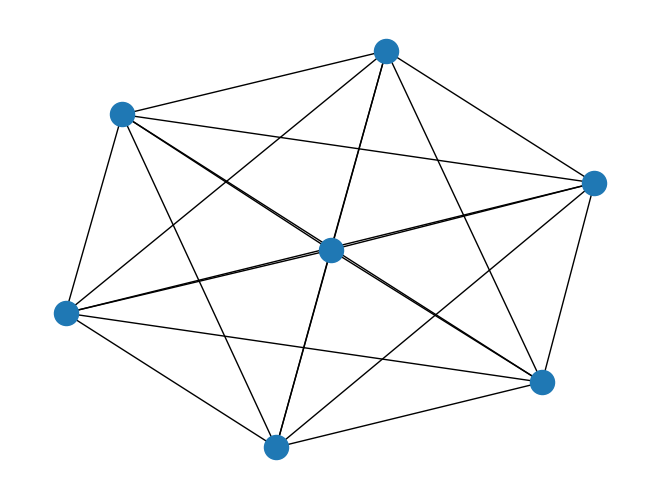

In [3]:
nx.draw(G)

## Generate Positions

In [4]:
import random
random.seed(412)

In [5]:
node_pos = {i: (random.random(), random.random()) for i in range(n)}

In [6]:
node_pos

{0: (0.287485695366838, 0.7104741468198333),
 1: (0.0580333404729646, 0.9947687625728054),
 2: (0.11432784272625618, 0.1917743575935109),
 3: (0.1953941544050074, 0.47713398189152945),
 4: (0.07178464233813753, 0.6979459611820233),
 5: (0.3522304140706385, 0.9327051484913186),
 6: (0.5107762162039668, 0.6500261891739658)}

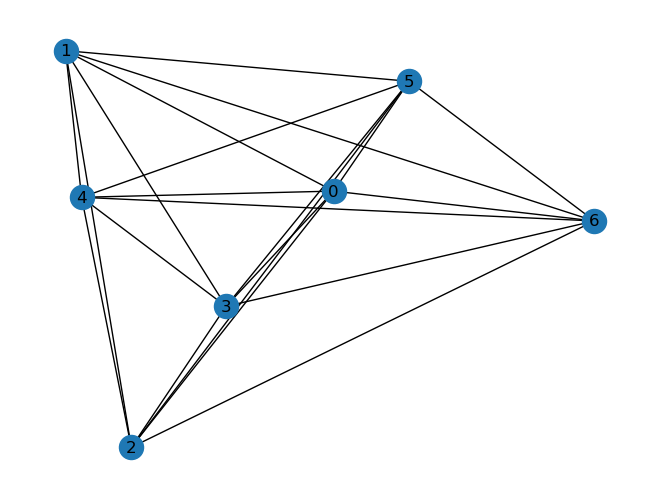

In [7]:
nx.draw(G, pos=node_pos, labels={i:i for i in range(n)})

## Calculate Distances

In [8]:
import math

def distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

In [9]:
for n1, n2 in G.edges:
    G.edges[(n1, n2)]['weight'] = distance(node_pos[n1], node_pos[n2])

In [10]:
for n1, n2 in G.edges:
    print(f"The distance between {n1} and {n2} is: {G.edges[(n1, n2)]['weight']}")

The distance between 0 and 1 is: 0.3653379417915337
The distance between 0 and 2 is: 0.546839202393655
The distance between 0 and 3 is: 0.25085550519271566
The distance between 0 and 4 is: 0.21606457301710913
The distance between 0 and 5 is: 0.23147029335088753
The distance between 0 and 6 is: 0.23132793233691618
The distance between 1 and 2 is: 0.8049652696930453
The distance between 1 and 3 is: 0.5355499597376756
The distance between 1 and 4 is: 0.29714116801355345
The distance between 1 and 5 is: 0.30067226394579677
The distance between 1 and 6 is: 0.5690549652176247
The distance between 2 and 3 is: 0.29665107798338225
The distance between 2 and 4 is: 0.5079563132579709
The distance between 2 and 5 is: 0.7781876832440358
The distance between 2 and 6 is: 0.6059422860140757
The distance between 3 and 4 is: 0.2530558074251511
The distance between 3 and 5 is: 0.4818118929447447
The distance between 3 and 6 is: 0.35966312049410293
The distance between 4 and 5 is: 0.3657344759641328
The d

In [11]:
weights = [(n1, n2, G.edges[(n1, n2)]['weight']) for n1, n2 in G.edges]

In [12]:
weights = sorted(weights, key=lambda x: x[2])

In [13]:
weights

[(0, 4, 0.21606457301710913),
 (0, 6, 0.23132793233691618),
 (0, 5, 0.23147029335088753),
 (0, 3, 0.25085550519271566),
 (3, 4, 0.2530558074251511),
 (2, 3, 0.29665107798338225),
 (1, 4, 0.29714116801355345),
 (1, 5, 0.30067226394579677),
 (5, 6, 0.3241051764702966),
 (3, 6, 0.35966312049410293),
 (0, 1, 0.3653379417915337),
 (4, 5, 0.3657344759641328),
 (4, 6, 0.4415992600475029),
 (3, 5, 0.4818118929447447),
 (2, 4, 0.5079563132579709),
 (1, 3, 0.5355499597376756),
 (0, 2, 0.546839202393655),
 (1, 6, 0.5690549652176247),
 (2, 6, 0.6059422860140757),
 (2, 5, 0.7781876832440358),
 (1, 2, 0.8049652696930453)]

## Kruskal Algorithm

In [14]:
root = {i: i for i in range(n)}
root_rank = {i: 0 for i in range(n)}

selected_edges = []

def update_root(root, root_node, new_node):
    for key in root.keys():
        if root[key] == root_node:
            root[key] = new_node

for item in weights:
    print('-' * 16)
    
    n1, n2, weight = item
    print(f'n1: {n1}, n2: {n2}, weight: {weight}')
    
    # print(f'n1: {n1}, n2: {n2}, weight: {weight}')
    if root[n1] != root[n2]:
        print('will change')
        selected_edges.append(item)

        n1_parent = root[n1]
        n2_parent = root[n2]

        if root_rank[n1_parent] > root_rank[n2_parent]:
            # root[n2] = root[n1]
            update_root(root, root[n2], root[n1])
            root_rank[n1_parent] += 1
        else:
            # root[n1] = root[n2]
            update_root(root, root[n1], root[n2])
            root_rank[n2_parent] += 1

        

    print(f'root:      {root}\nroot_rank: {root_rank}')

    if len(selected_edges) >= n - 1:
        break

----------------
n1: 0, n2: 4, weight: 0.21606457301710913
will change
root:      {0: 4, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
root_rank: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}
----------------
n1: 0, n2: 6, weight: 0.23132793233691618
will change
root:      {0: 4, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 4}
root_rank: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0}
----------------
n1: 0, n2: 5, weight: 0.23147029335088753
will change
root:      {0: 4, 1: 1, 2: 2, 3: 3, 4: 4, 5: 4, 6: 4}
root_rank: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0}
----------------
n1: 0, n2: 3, weight: 0.25085550519271566
will change
root:      {0: 4, 1: 1, 2: 2, 3: 4, 4: 4, 5: 4, 6: 4}
root_rank: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0}
----------------
n1: 3, n2: 4, weight: 0.2530558074251511
root:      {0: 4, 1: 1, 2: 2, 3: 4, 4: 4, 5: 4, 6: 4}
root_rank: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0}
----------------
n1: 2, n2: 3, weight: 0.29665107798338225
will change
root:      {0: 4, 1: 1, 2: 4, 3: 4, 4: 4, 5: 4,

In [15]:
selected_edges

[(0, 4, 0.21606457301710913),
 (0, 6, 0.23132793233691618),
 (0, 5, 0.23147029335088753),
 (0, 3, 0.25085550519271566),
 (2, 3, 0.29665107798338225),
 (1, 4, 0.29714116801355345)]

In [16]:
final_edges = [(item[0], item[1]) for item in selected_edges]

In [17]:
final_edges

[(0, 4), (0, 6), (0, 5), (0, 3), (2, 3), (1, 4)]

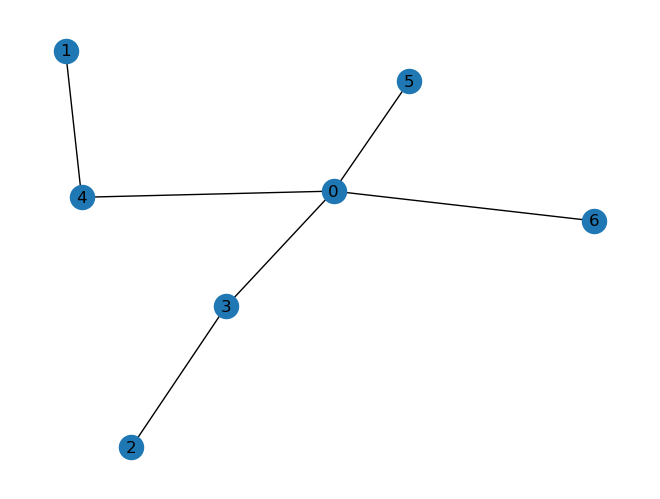

In [18]:
nx.draw(G, edgelist=final_edges, pos=node_pos, labels = {i: i for i in range(n)})